In [84]:
import requests
import json
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from collections import defaultdict
import datetime
import csv

In [59]:
sber = '3529'
page = 100
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&per_page={num_per_page}'

In [60]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [61]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [126]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [62]:
len(all_vacancy_ids)

978

In [63]:
vac_id = 43326020
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()

In [64]:
from collections import defaultdict
tab_dict2 = defaultdict(list)

In [65]:
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacancy = res.json()
    tab_dict2['id'].append(vacancy.get('id'))
    tab_dict2['name'].append(vacancy.get('name'))
    tab_dict2['published_at'].append(vacancy.get('published_at'))
    tab_dict2['description'].append(vacancy.get('description'))
    skills = ','.join([x.get('name') for x in vacancy.get('key_skills')])
    tab_dict2['key_skills'].append(skills)

  0%|          | 0/978 [00:00<?, ?it/s]

In [72]:
df_1 = pd.DataFrame(tab_dict2)
df_1.head(3)

,id,name,published_at,description,key_skills
0,54162408,"Стажёр по направлению ""Data Engineering"" от SB...",2022-03-21T16:08:01+0300,"<p>Современный стек разработки, передовые техн...","Python,SQL,СУБД,MS Excel,Git,Анализ данных"
1,53568652,Менеджер по обслуживанию,2022-03-09T13:38:12+0300,<p>Сбер — лучший работодатель России. У нас бо...,
2,46380141,Менеджер по работе с клиентами,2022-03-18T14:30:24+0300,<p>Сбер — лучший работодатель России. У нас бо...,"Активные продажи,Поиск и привлечение клиентов"


# 2. Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии

In [70]:
df_1.description

0      <p>Современный стек разработки, передовые техн...
1      <p>Сбер — лучший работодатель России. У нас бо...
2      <p>Сбер — лучший работодатель России. У нас бо...
3      <p>Проект представляет собой систему для выгру...
4      <p>Сбер — лучший работодатель России. У нас бо...
                             ...                        
973    <p>Мы делаем новую систему авторизации сотрудн...
974    <p>В дивизион &quot;Развитие внешнеэкономическ...
975    <p>В Отдел сопровождения депозитарных операций...
976    <p>HR-платформа СБЕРа - собственный продукт ко...
977    <p>Мы создаем команду для разработки продукта ...
Name: description, Length: 978, dtype: object

## 3.Создайте аналогичный vacancy DataFrame только добавьте поле skills

In [71]:
df_2 = df_1.copy()
df_2.head(3)

,id,name,published_at,description,key_skills
0,54162408,"Стажёр по направлению ""Data Engineering"" от SB...",2022-03-21T16:08:01+0300,"<p>Современный стек разработки, передовые техн...","Python,SQL,СУБД,MS Excel,Git,Анализ данных"
1,53568652,Менеджер по обслуживанию,2022-03-09T13:38:12+0300,<p>Сбер — лучший работодатель России. У нас бо...,
2,46380141,Менеджер по работе с клиентами,2022-03-18T14:30:24+0300,<p>Сбер — лучший работодатель России. У нас бо...,"Активные продажи,Поиск и привлечение клиентов"


In [73]:
df_2.columns

Index(['id', 'name', 'published_at', 'description', 'key_skills'], dtype='object')

In [76]:
df_2["skills"] = df_2['key_skills']
df_2.columns
df_2['skills'].replace('', np.nan, inplace=True)
df_2 = df_2[~df_2['skills'].isnull()]
df_2.head(3)

,id,name,published_at,description,key_skills,skills
0,54162408,"Стажёр по направлению ""Data Engineering"" от SB...",2022-03-21T16:08:01+0300,"<p>Современный стек разработки, передовые техн...","Python,SQL,СУБД,MS Excel,Git,Анализ данных","Python,SQL,СУБД,MS Excel,Git,Анализ данных"
2,46380141,Менеджер по работе с клиентами,2022-03-18T14:30:24+0300,<p>Сбер — лучший работодатель России. У нас бо...,"Активные продажи,Поиск и привлечение клиентов","Активные продажи,Поиск и привлечение клиентов"
3,54324115,Junior Python разработчик,2022-03-25T15:08:14+0300,<p>Проект представляет собой систему для выгру...,"Python,Docker,Redis,Django Framework,NLP","Python,Docker,Redis,Django Framework,NLP"


## 4.Переведите даты публикаций в datetime

In [79]:
df_1.published_at = pd.to_datetime(df_1.published_at)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   id            978 non-null    object                               
 1   name          978 non-null    object                               
 2   published_at  978 non-null    datetime64[ns, pytz.FixedOffset(180)]
 3   description   978 non-null    object                               
 4   key_skills    978 non-null    object                               
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), object(4)
memory usage: 38.3+ KB


## 5.Постройте график опубликованных вакансий по датам

In [81]:
df_1.head(5)

,id,name,published_at,description,key_skills
0,54162408,"Стажёр по направлению ""Data Engineering"" от SB...",2022-03-21 16:08:01+03:00,"<p>Современный стек разработки, передовые техн...","Python,SQL,СУБД,MS Excel,Git,Анализ данных"
1,53568652,Менеджер по обслуживанию,2022-03-09 13:38:12+03:00,<p>Сбер — лучший работодатель России. У нас бо...,
2,46380141,Менеджер по работе с клиентами,2022-03-18 14:30:24+03:00,<p>Сбер — лучший работодатель России. У нас бо...,"Активные продажи,Поиск и привлечение клиентов"
3,54324115,Junior Python разработчик,2022-03-25 15:08:14+03:00,<p>Проект представляет собой систему для выгру...,"Python,Docker,Redis,Django Framework,NLP"
4,52849639,Финансовый консультант,2022-03-23 19:41:59+03:00,<p>Сбер — лучший работодатель России. У нас бо...,


In [82]:
df_1['vacdate'] = df_1['published_at']
df_1['vacdate'] = pd.to_datetime(df_1['vacdate']).dt.date
df_1.head(5)

,id,name,published_at,description,key_skills,vacdate
0,54162408,"Стажёр по направлению ""Data Engineering"" от SB...",2022-03-21 16:08:01+03:00,"<p>Современный стек разработки, передовые техн...","Python,SQL,СУБД,MS Excel,Git,Анализ данных",2022-03-21
1,53568652,Менеджер по обслуживанию,2022-03-09 13:38:12+03:00,<p>Сбер — лучший работодатель России. У нас бо...,,2022-03-09
2,46380141,Менеджер по работе с клиентами,2022-03-18 14:30:24+03:00,<p>Сбер — лучший работодатель России. У нас бо...,"Активные продажи,Поиск и привлечение клиентов",2022-03-18
3,54324115,Junior Python разработчик,2022-03-25 15:08:14+03:00,<p>Проект представляет собой систему для выгру...,"Python,Docker,Redis,Django Framework,NLP",2022-03-25
4,52849639,Финансовый консультант,2022-03-23 19:41:59+03:00,<p>Сбер — лучший работодатель России. У нас бо...,,2022-03-23


In [83]:
vacs_stat = df_1.groupby('vacdate')['id'].count().sort_values(ascending=False)
vacs_stat.head()

vacdate
2022-03-15    103
2022-02-28     82
2022-03-18     79
2022-03-09     74
2022-03-21     72
Name: id, dtype: int64

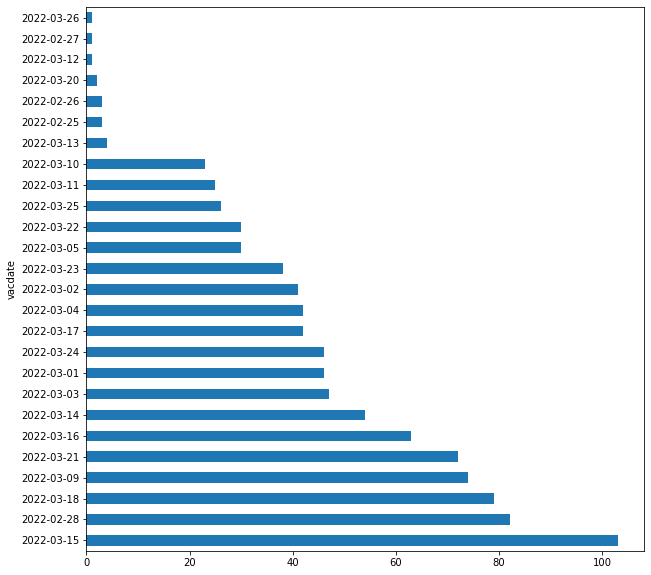

In [85]:
rcParams['figure.figsize'] = 10,10
vacs_stat.plot(kind='barh')
plt.show()

## 6.Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [91]:
df_1['weekday_num'] = df_1['published_at']
df_1.weekday_num = pd.to_datetime(df_1.weekday_num)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   id            978 non-null    object                               
 1   name          978 non-null    object                               
 2   published_at  978 non-null    datetime64[ns, pytz.FixedOffset(180)]
 3   description   978 non-null    object                               
 4   key_skills    978 non-null    object                               
 5   vacdate       978 non-null    object                               
 6   weekday_num   978 non-null    datetime64[ns, pytz.FixedOffset(180)]
dtypes: datetime64[ns, pytz.FixedOffset(180)](2), object(5)
memory usage: 53.6+ KB


In [92]:
df_1['weekday_num'] = df_1['weekday_num'].dt.day_name()

In [93]:
df_1.groupby('weekday_num')['id'].count().sort_values(ascending=False).reset_index()

,weekday_num,id
0,Wednesday,216
1,Monday,208
2,Tuesday,179
3,Friday,175
4,Thursday,158
5,Saturday,35
6,Sunday,7


## 7.Найдите те вакансии с использованием python, которые вам интересны

In [94]:
nice1 = df_1.name.str.lower().str.contains('data analyst')
nice2 = df_1.key_skills.str.lower().str.contains('python')
a = df_1[nice1 & nice2].count()
a.id

1

## 8.Определите по полю skills какие навыки больше всего востребованы для этих вакансий

In [95]:
df_2.head(3)

,id,name,published_at,description,key_skills,skills
0,54162408,"Стажёр по направлению ""Data Engineering"" от SB...",2022-03-21T16:08:01+0300,"<p>Современный стек разработки, передовые техн...","Python,SQL,СУБД,MS Excel,Git,Анализ данных","Python,SQL,СУБД,MS Excel,Git,Анализ данных"
2,46380141,Менеджер по работе с клиентами,2022-03-18T14:30:24+0300,<p>Сбер — лучший работодатель России. У нас бо...,"Активные продажи,Поиск и привлечение клиентов","Активные продажи,Поиск и привлечение клиентов"
3,54324115,Junior Python разработчик,2022-03-25T15:08:14+0300,<p>Проект представляет собой систему для выгру...,"Python,Docker,Redis,Django Framework,NLP","Python,Docker,Redis,Django Framework,NLP"


In [96]:
df_3 = df_2.copy()
df_3.head(3)

,id,name,published_at,description,key_skills,skills
0,54162408,"Стажёр по направлению ""Data Engineering"" от SB...",2022-03-21T16:08:01+0300,"<p>Современный стек разработки, передовые техн...","Python,SQL,СУБД,MS Excel,Git,Анализ данных","Python,SQL,СУБД,MS Excel,Git,Анализ данных"
2,46380141,Менеджер по работе с клиентами,2022-03-18T14:30:24+0300,<p>Сбер — лучший работодатель России. У нас бо...,"Активные продажи,Поиск и привлечение клиентов","Активные продажи,Поиск и привлечение клиентов"
3,54324115,Junior Python разработчик,2022-03-25T15:08:14+0300,<p>Проект представляет собой систему для выгру...,"Python,Docker,Redis,Django Framework,NLP","Python,Docker,Redis,Django Framework,NLP"


In [97]:
not_true = df_3.groupby('skills')['id'].count().sort_values(ascending=False).head(10)
not_true

skills
Java                                                     2
Docker,Jenkins,Linux,Atlassian Jira,Git                  2
Python,Linux,Atlassian Jira,Atlassian Confluence,Bash    2
Swift,UIKit,iOS,REST                                     2
Депозитарий,Депозитарный учет,Ценные бумаги              2
SQL,Atlassian Jira,Kafka,PostgreSQL,Java                 2
JavaScript,Redux,React,Node.js                           2
React,JavaScript,TypeScript,CSS,Team management,SPA      2
Linux,SQL                                                2
Linux                                                    2
Name: id, dtype: int64

## 9.Постройте график наиболее востребованных вакансий

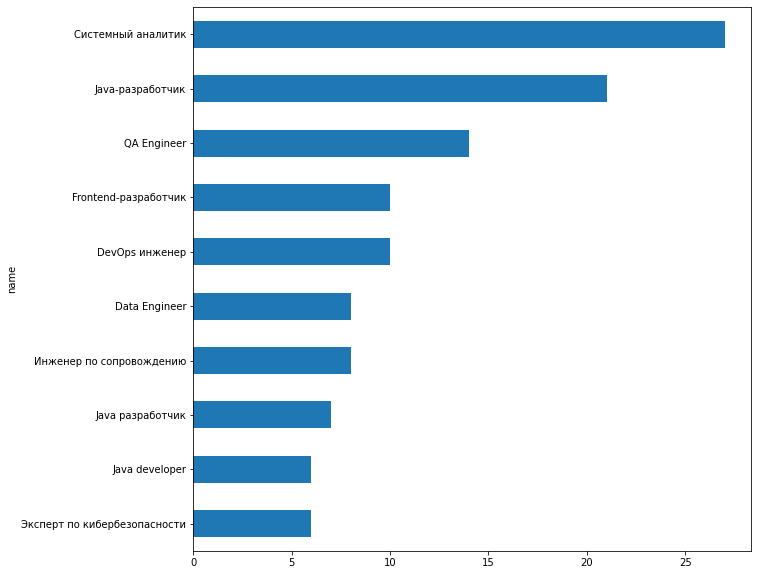

In [98]:
cool_vac = df_1.groupby('name')['id'].count().sort_values(ascending=False).head(10)
cool_vac
cool_vac.sort_values(ascending=True).plot(kind='barh')
plt.show()